In [29]:
#Import Geoff's Preprocessor
from x_ray import preprocessor 
import pandas as pd

In [30]:
##Create an instance of the class from Geoff's Preprocessor 
##and develop testing & response datasets split into testing and training subsets.  

#Use the function (provide a path, select input labels, and call the function)
csv_path = 'C:/Users/stany/Desktop/sample_data/sample_labels.csv'  #C:\Users\stany\Desktop
image_path = 'C:/Users/stany/Desktop/sample_data/images/'
input_labels = ['Pneumothorax', 'Effusion']

#Create an instance of the class 
preprocessor = preprocessor(csv_path, image_path, input_labels, 100, 100)

X_train, X_val, X_test, y_train, y_val, y_test = preprocessor.prepare_x_ray_data()

C:\Users\stany\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
#Convert y_train into binaries
new_y_train = []
for i in y_train: 
    if i ==15: 
        new_y_train.append(1)
    else:
        new_y_train.append(0)
new_y_train = pd.Series(new_y_train)

In [32]:
#Convert y_test into binaries 
new_y_test = []
for i in y_test:
    if i == 15:
        new_y_test.append(1)
    else:
        new_y_test.append(0)
new_y_test = pd.Series(new_y_test)

In [33]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [34]:
#Create a Gaussian Classifier 
classifier=RandomForestClassifier(n_estimators=1000, random_state=123, oob_score=True) #Note, n_estimators is the number of trees

In [35]:
#Train the model using the training set, X_train, y_train 
classifier.fit(X_train,new_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=123, verbose=0, warm_start=False)

In [36]:
#Save the predictions 
y_pred = classifier.predict(X_test)

In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [38]:
#Print Model Accuracy, how often is the classifier correct? 
print("Accuracy:",metrics.accuracy_score(new_y_test, y_pred))

Accuracy: 0.6875


In [39]:
#Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'Confusion Matrix')

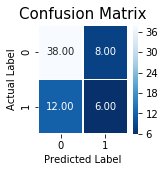

In [40]:
#Create Confusion Matrix
cm = metrics.confusion_matrix(new_y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square = False, cmap = 'Blues_r', xticklabels=True,yticklabels=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', size = 15)

In [41]:
#Other classification metrics
print("Error Score:",1-metrics.accuracy_score(new_y_test,y_pred))
print("Precision:",metrics.precision_score(new_y_test,y_pred))
print("Recall:",metrics.recall_score(new_y_test,y_pred))
print("F1 Score:",metrics.f1_score(new_y_test,y_pred))

Error Score: 0.3125
Precision: 0.428571428571
Recall: 0.333333333333
F1 Score: 0.375


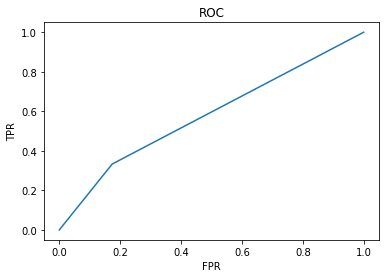

AUC:  0.579710144928


In [42]:
fpr, tpr, thresholds = metrics.roc_curve(new_y_test,y_pred)
plt.plot(fpr,tpr)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("AUC: ",metrics.roc_auc_score(new_y_test,y_pred))